In [114]:
from diffusers import DiffusionPipeline
from PIL import Image
import logging
import numpy as np
from python_coreml_stable_diffusion.pipeline import get_coreml_pipe
from diffusers import StableDiffusionPipeline
import pylrc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import re
from PIL import ImageDraw, ImageFont
import os
import imageio
import datetime
import math
from IPython.display import Video

In [6]:
# Boilerplate diffuser code for running the original SD model on m1 mac (https://huggingface.co/docs/diffusers/optimization/mps)
# pipe = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
# pipe = pipe.to("mps")

# # Recommended if your computer has < 64 GB of RAM
# pipe.enable_attention_slicing()

# prompt = "a photo of an astronaut riding a horse on mars"

# # First-time "warmup" pass if PyTorch version is 1.13 (see explanation above)
# # _ = pipe(prompt, num_inference_steps=1)

# # Results match those from the CPU device after the warmup pass.
# image = pipe(prompt, num_inference_steps=20).images[0]

# # Convert the numpy array to an Image object
# img = Image.fromarray(image)

# # Show the image
# img.show()

In [7]:
def get_model(
    model_version, i, compute_unit, prompt, num_inference_steps, guidance_scale
):
    logger.info("Initializing PyTorch pipe for reference configuration")

    pytorch_pipe = StableDiffusionPipeline.from_pretrained(
        model_version, use_auth_token=True
    )

    user_specified_scheduler = None
    # if args.scheduler is not None:
    #     user_specified_scheduler = SCHEDULER_MAP[args.scheduler].from_config(
    #         pytorch_pipe.scheduler.config
    #     )

    # Use the coreml model for efficiency on m1 mac
    coreml_pipe = get_coreml_pipe(
        pytorch_pipe=pytorch_pipe,
        mlpackages_dir=i,
        model_version=model_version,
        compute_unit=compute_unit,
        scheduler_override=user_specified_scheduler,
    )

    return coreml_pipe

In [8]:
def generate_image(model, prompt, neg_prompt, num_inference_steps, guidance_scale, out_path):
    logger.info("Beginning image generation.")
    image = model(
        prompt=prompt,
        negative_prompt=neg_prompt,
        height=model.height,
        width=model.width,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
    )
    
    return image
    #logger.info(f"Saving generated image to {out_path}")
    #image["images"][0].save(out_path)

In [9]:
def init(seed):
    # TODO: Figure out how to make the results deterministic
    logger.info(f"Setting random seed to {seed}")
    np.random.seed(seed)

In [10]:
# Init logging
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Constants
seed = 93
model_version = "runwayml/stable-diffusion-v1-5"
i = "stable_diffusion_apple/models/coreml-stable-diffusion-v1-5_split_einsum_packages"
compute_unit = "ALL"
prompt = "a photo of an astronaut riding a horse on mars"
num_inference_steps = 20
guidance_scale = 7.5
out_path = "./img.png"

init(seed)

INFO:__main__:Setting random seed to 93


In [11]:
# Initializing the coreml model is unfortunately very slow
model = get_model(
    model_version, i, compute_unit, prompt, num_inference_steps, guidance_scale
)

INFO:__main__:Initializing PyTorch pipe for reference configuration
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/Users/johnphillips/Documents/sd-auto-music-vid/venv/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
INFO:python_coreml_stable_diffusion.pipeline:Removed PyTorch pipe to reduce peak memory consumption
INFO:python_coreml_stable_diffusion.pipeline:Loading Core ML models in memory from stable_diffusion_apple/models/coreml-stable-diffusion-v1-5_split_einsum_packages
INFO:python_coreml_stable_diffusion.coreml_model:Loading text_encoder mlpackage
INFO:python_coreml_stable_diffusion.coreml_model:Loading stable_diffusion_apple/models/coreml-stable-diffusion-v1-5_split_einsum_packages/Stable_Dif

In [12]:
image = generate_image(model, prompt, "", num_inference_steps, guidance_scale, out_path)

INFO:__main__:Beginning image generation.
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:19<00:00,  1.06it/s]
INFO:python_coreml_stable_diffusion.pipeline:Generated image has nsfw concept=False


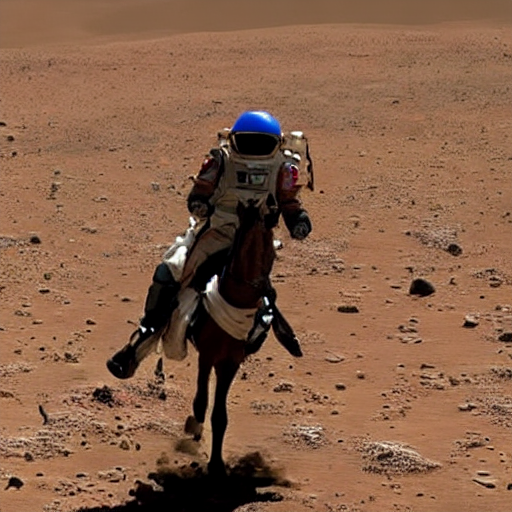

In [ ]:
image["images"][0]

In [14]:
lrc_file = open('Yesterday.lrc')
lrc_string = ''.join(lrc_file.readlines())
lrc_file.close()

subs = pylrc.parse(lrc_string)

In [15]:
prompts_file = open('yesterday_prompts.txt')
prompts = []
for line in prompts_file.readlines():
    prompts.append
    match = re.search(r'\d+\.\s+(.+)', line)
    assert match
    if match:
        words = match.group(1)
        prompts.append(words)
    
prompts_file.close()
assert len(prompts) == len(subs)

In [89]:
song_images = []

for j, sub in enumerate(subs):
    text = sub.text
    time = sub.time
    # Simply use the text as a prompt for now
    prompt = prompts[j]
    neg_prompt = "text, words"
    images = generate_image(model, prompt, neg_prompt, num_inference_steps, guidance_scale, out_path)
    image = images["images"][0]
    song_images.append(image)
    

INFO:__main__:Beginning image generation.
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:19<00:00,  1.10it/s]
INFO:python_coreml_stable_diffusion.pipeline:Generated image has nsfw concept=False
INFO:__main__:Beginning image generation.
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:18<00:00,  1.14it/s]
INFO:python_coreml_stable_diffusion.pipeline:Generated image has nsfw concept=False
INFO:__main__:Beginning image generation.
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:18<00:00,  1.15it/s]
INFO:python_coreml_stable_diffusion.pipeline:Generated image has nsfw concept=False
INFO:__main__:Beginning image generation.
100%|████████████████████████████████████████████████████████████████████

In [109]:
#plt.figure(figsize=(100,100))
#columns = 1

song_images_with_lyrics = list(map(lambda img: img.copy(), song_images))


def get_wrapped_text(text: str, font: ImageFont.ImageFont,
                     line_length: int):
        """From: https://stackoverflow.com/a/67203353"""
        lines = ['']
        for word in text.split():
            line = f'{lines[-1]} {word}'.strip()
            if font.getlength(line) <= line_length:
                lines[-1] = line
            else:
                lines.append(word)
        return '\n'.join(lines)

font = ImageFont.truetype("Arial", 15)
for j, image in enumerate(song_images_with_lyrics):
    #plt.subplot(len(subs) // columns + 1, columns, j + 1)
    #plt.axis('off')
    #plt.title(sub.text + "(prompt: {})".format(prompt))
    x = 30
    y = 400
    #plt.text(x, y, subs[j].text, color="white", bbox=dict(fill=True, facecolor="black"))
    #plt.imshow(image)
    
    draw = ImageDraw.Draw(image)
    
    text = "Lyric: " + subs[j].text + "\nPrompt: " + get_wrapped_text(prompts[j], font, 420)
    xy = draw.multiline_textbbox((15, 400), text, font=font, align="center")
    draw.rectangle(xy, fill=(0, 0, 0), outline=None, width=2)
    draw.text(
    (15, 400),  # Coordinates
    text,  # Text
    (255, 255, 255),  # Color
    font=font,
    align="center"
    )

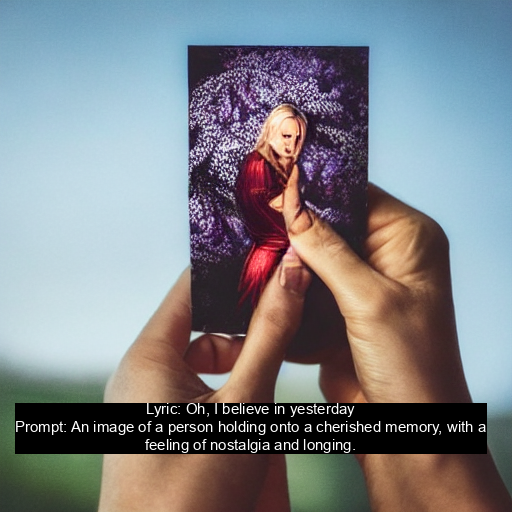

In [110]:
song_images_with_lyrics[2]

In [92]:
"""plt.figure(figsize=(60,30))
columns = 1

for j in range(len(song_images)):
    plt.subplot(len(subs) // columns + 1, columns, j + 1)
    plt.axis('off')
    plt.title(subs[j].text)
    plt.imshow(song_images[j])

plt.tight_layout()"""

"plt.figure(figsize=(60,30))\ncolumns = 1\n\nfor j in range(len(song_images)):\n    plt.subplot(len(subs) // columns + 1, columns, j + 1)\n    plt.axis('off')\n    plt.title(subs[j].text)\n    plt.imshow(song_images[j])\n\nplt.tight_layout()"

In [95]:
subs.length

'02:05.45'

In [96]:
x = datetime.datetime.strptime(subs.length, '%M:%S.%f')
song_minutes, song_seconds, song_milliseconds = x.minute, x.second, x.microsecond / 1000
song_length_milliseconds = song_minutes * 60000 + song_seconds * 1000 + song_milliseconds
song_length_milliseconds

125450.0

In [111]:
# Set the frames per second (fps) and output file name
fps = 30
output_file = "output.mp4"

total_frames = fps * math.ceil(song_length_milliseconds / 1000)
#print(total_frames)

# Create an imageio writer object with the specified fps and output format
writer = imageio.get_writer(output_file, fps=fps)

image_idx = 0
next_image_timestep_milliseconds = subs[image_idx].minutes * 60000 + subs[image_idx].seconds * 1000 + subs[image_idx].milliseconds
#print(next_image_timestep_milliseconds)
black_image = Image.new('RGB', (512, 512))
image_list = [black_image] + song_images_with_lyrics
for j in range(total_frames):
    timestep_milliseconds = j / fps * 1000
    #print(j, timestep_milliseconds, next_image_timestep_milliseconds)
    if timestep_milliseconds >= next_image_timestep_milliseconds:
        image_idx += 1
        if image_idx < len(subs):
            next_image_timestep_milliseconds = subs[image_idx].minutes * 60000 + subs[image_idx].seconds * 1000 + subs[image_idx].milliseconds
        else:
            # Keep using this image until the end
            next_image_timestep_milliseconds = math.inf
            
    #print(j, image_idx)
    np_image = np.array(image_list[image_idx])

    writer.append_data(np_image)
    
# Close the writer object to finalize the output file
writer.close()


In [112]:
def add_audio_to_video(video_file, audio_file, output_file):
    # Combine the audio and video. The audio needs to be transcoded so that -shortest result in silence at the end
    os.system(f"ffmpeg -i {video_file} -i {audio_file} -shortest -c:v copy -c:a aac -map 0:v:0 -map 1:a:0  {output_file}")

add_audio_to_video("output.mp4", "yesterday.mp3", "final_video.mp4")

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --di

In [113]:
Video(filename="final_video.mp4")